<a href="https://colab.research.google.com/github/sabshaik27/Deep-Learning/blob/main/self%20organization/SOM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv
User uploaded file "Credit_Card_Applications.csv" with length 35641 bytes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataset = iris.drop(['species'],axis =1)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
cleanDataSet = pd.DataFrame(standard.fit_transform(dataset))
cleanDataSet.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# numpy base SOM implementation
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=c3834397862bae1ace464a6af7ea398889d11a06e09bff35924d91a8a80e50f3
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [ ]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
som = MiniSom(7,7,4, sigma=0.25,neighborhood_function='gaussian')
som.train_random(cleanDataSet.to_numpy(),30000)

In [ ]:
target = iris.species.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

In [ ]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [ ]:
labels_map

defaultdict(list,
            {(0, 0): Counter({2: 5}),
             (0, 1): Counter({1: 5}),
             (0, 2): Counter({1: 4}),
             (0, 3): Counter({2: 5}),
             (0, 4): Counter({2: 4}),
             (0, 5): Counter({2: 1}),
             (0, 6): Counter({2: 4}),
             (1, 0): Counter({2: 2}),
             (1, 1): Counter({2: 5}),
             (1, 2): Counter({2: 1}),
             (1, 3): Counter({2: 4}),
             (1, 4): Counter({2: 1}),
             (1, 5): Counter({1: 1, 2: 2}),
             (1, 6): Counter({2: 3}),
             (2, 2): Counter({1: 1}),
             (2, 3): Counter({1: 1, 2: 1}),
             (2, 4): Counter({2: 3}),
             (2, 5): Counter({1: 4}),
             (2, 6): Counter({1: 2}),
             (3, 0): Counter({0: 12}),
             (3, 1): Counter({0: 7}),
             (3, 3): Counter({1: 3}),
             (3, 4): Counter({1: 1}),
             (3, 5): Counter({1: 6}),
             (3, 6): Counter({1: 6}),
             (4, 0)

In [ ]:
label_names

array([0, 1, 2], dtype=int8)

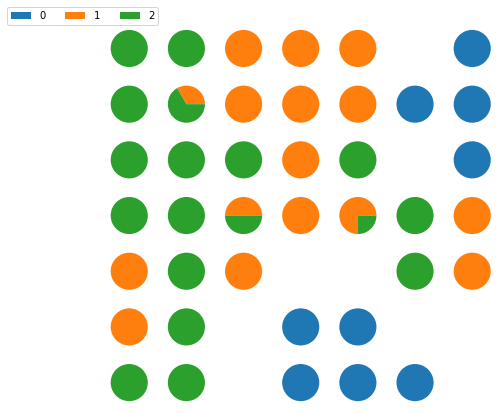

In [ ]:
plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)

plt.show()

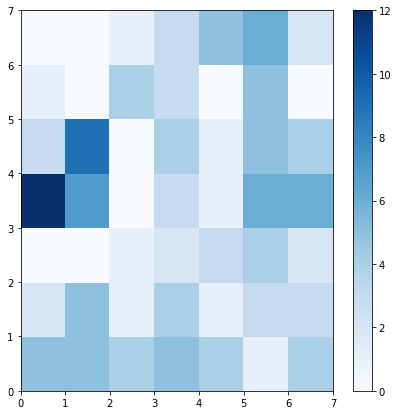

In [ ]:
plt.figure(figsize=(7, 7))
frequencies = np.zeros((7, 7))
for position, values in som.win_map(cleanDataSet.to_numpy()).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv
User uploaded file "Credit_Card_Applications.csv" with length 35641 bytes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=3089cef7b2840e30f8ccb891ca6ef7eb28ef2c7478f28a25583d6dc6484ab313
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)



In [ ]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [ ]:


# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']


ImportError: ignored

In [ ]:
#mappings = som.win_map(X)
#frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
#

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
#frauds = np.concatenate((mappings[(8,3)], mappings[(6,8)]), axis = 0)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)




In [ ]:
frauds = sc.inverse_transform(frauds)

In [ ]:
frauds

array([[1.5797767e+07, 1.0000000e+00, 2.5170000e+01, 3.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.3000000e+01],
       [1.5804235e+07, 1.0000000e+00, 2.9500000e+01, 5.8000000e-01,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 2.9000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.4000000e+02, 2.8040000e+03],
       [1.5791944e+07, 1.0000000e+00, 1.9420000e+01, 7.2500000e+00,
        2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 2.0000000e+00],
       [1.5699839e+07, 0.0000000e+00, 2.8170000e+01, 5.8500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [ ]:


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

ImportError: ignored